[Reference](https://anitaowens.medium.com/how-to-simulate-sales-data-in-python-67c0dd4dae56)

In [1]:
#Import pandas and numpy
import pandas as pd
import numpy as np
from numpy import random

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import Seaborn
import seaborn as sns

#Import datetime for working with dates
from datetime import datetime

In [2]:
#Set seed so that when reproducing the dataset, we get the same results.
np.random.seed(90210)

In [3]:
#Create date sequence of 52 weeks using date_range function
sales_date = pd.date_range('2019-01-01', periods=52, freq = 'W-MON')

In [4]:
#Create weeks where there were promotions running. 10% likelihood of a promotion
promotion = np.random.binomial(n=1, p=0.10, size=len(sales_date))

In [5]:
#Create a repeating list of 0's
social = [0] * len(sales_date)

In [6]:
import random #So as not to be confused with np.random
np.random.seed(90210)

prices_list = [4.50, 4.99]

#Create price values
price = random.choices(prices_list, k = len(sales_date))

#Check output
print(price)

[4.5, 4.5, 4.99, 4.99, 4.5, 4.99, 4.99, 4.99, 4.99, 4.5, 4.5, 4.5, 4.99, 4.5, 4.99, 4.5, 4.5, 4.99, 4.99, 4.5, 4.99, 4.99, 4.99, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.99, 4.99, 4.5, 4.99, 4.99, 4.5, 4.99, 4.5, 4.5, 4.99, 4.5, 4.5, 4.5, 4.5, 4.99, 4.99, 4.5, 4.99, 4.99, 4.99]


In [7]:
#Generate unit sales - poisson distribution
temp_sales = np.random.poisson(size=len(sales_date), lam = 8300)

#Check results
print(temp_sales)

[8211 8273 8337 8386 8285 8395 8239 8267 8272 8259 8418 8363 8191 8259
 8228 8220 8504 8265 8397 8129 8372 8291 8337 8374 8307 8374 8294 8503
 8276 8335 8423 8329 8289 8209 8378 8210 8311 8207 8348 8259 8386 8399
 8227 8439 8171 8308 8276 8450 8267 8406 8237 8125]


In [8]:
#Scale sales up according to price to follow a logarithmic function
#Scale sales by multiplying sales by the log of price
temp_sales = temp_sales * np.log(price)

#Check output
print(temp_sales)

[12349.97950493 12443.23230353 13401.1931797  13479.95753928
 12461.28123229 13494.42446246 13243.66446054 13288.67266601
 13296.70984556 12422.17521998 12661.32352606 12578.59926924
 13166.50753687 12422.17521998 13225.98266553 12363.5162015
 12790.67418219 13285.45779419 13497.63933428 12226.64515839
 13457.45343654 13327.25112785 13401.1931797  12595.1441206
 12494.37093502 12595.1441206  12474.81792886 12789.17010479
 12447.74453572 12536.48510213 12668.84391305 12527.46063775
 13324.03625603 13195.44138325 12601.16043019 13197.04881916
 13359.39984604 12343.96319534 13418.87497471 12422.17521998
 12613.19304937 13500.8542061  12374.04474328 12692.90915139
 12289.81640906 12495.87501242 13303.1395892  13582.8334375
 12434.20783915 13512.10625747 13240.44958872 13060.41676683]


In [9]:
#Add random seed
np.random.seed(90210)

#Add impact of increased sales due to week where a promotion was running
unit_sales = np.floor(temp_sales * (1 + promotion * 0.30))

#Check results
print(unit_sales)

[12349. 16176. 13401. 13479. 12461. 13494. 13243. 13288. 13296. 12422.
 12661. 12578. 13166. 12422. 13225. 16072. 12790. 13285. 13497. 12226.
 13457. 13327. 13401. 12595. 12494. 12595. 12474. 12789. 12447. 12536.
 16469. 12527. 13324. 13195. 16381. 13197. 13359. 16047. 13418. 12422.
 12613. 13500. 12374. 12692. 12289. 12495. 17294. 13582. 12434. 13512.
 13240. 13060.]


In [10]:
# Creating DataFrame
# Can use the zip function to convert lists of rows into lists of columns
df = pd.DataFrame(list(zip(sales_date, unit_sales, promotion, social, price)), columns = ['sales_date', 'unit_sales', 'promotion', 'social', 'price'])

# displaying resulting DataFrame
print(df)

   sales_date  unit_sales  promotion  social  price
0  2019-01-07     12349.0          0       0   4.50
1  2019-01-14     16176.0          1       0   4.50
2  2019-01-21     13401.0          0       0   4.99
3  2019-01-28     13479.0          0       0   4.99
4  2019-02-04     12461.0          0       0   4.50
5  2019-02-11     13494.0          0       0   4.99
6  2019-02-18     13243.0          0       0   4.99
7  2019-02-25     13288.0          0       0   4.99
8  2019-03-04     13296.0          0       0   4.99
9  2019-03-11     12422.0          0       0   4.50
10 2019-03-18     12661.0          0       0   4.50
11 2019-03-25     12578.0          0       0   4.50
12 2019-04-01     13166.0          0       0   4.99
13 2019-04-08     12422.0          0       0   4.50
14 2019-04-15     13225.0          0       0   4.99
15 2019-04-22     16072.0          1       0   4.50
16 2019-04-29     12790.0          0       0   4.50
17 2019-05-06     13285.0          0       0   4.99
18 2019-05-1

In [11]:
#Select and replace values between dates (We have 2 date ranges were we spent different amounts)
df.loc[(df['sales_date'] >= '2019-07-01') & (df['sales_date'] <= '2019-09-09'), 'social'] = 350
df.loc[(df['sales_date'] >= '2019-12-02') & (df['sales_date'] <= '2019-12-23'), 'social'] = 200
print(df)

   sales_date  unit_sales  promotion  social  price
0  2019-01-07     12349.0          0       0   4.50
1  2019-01-14     16176.0          1       0   4.50
2  2019-01-21     13401.0          0       0   4.99
3  2019-01-28     13479.0          0       0   4.99
4  2019-02-04     12461.0          0       0   4.50
5  2019-02-11     13494.0          0       0   4.99
6  2019-02-18     13243.0          0       0   4.99
7  2019-02-25     13288.0          0       0   4.99
8  2019-03-04     13296.0          0       0   4.99
9  2019-03-11     12422.0          0       0   4.50
10 2019-03-18     12661.0          0       0   4.50
11 2019-03-25     12578.0          0       0   4.50
12 2019-04-01     13166.0          0       0   4.99
13 2019-04-08     12422.0          0       0   4.50
14 2019-04-15     13225.0          0       0   4.99
15 2019-04-22     16072.0          1       0   4.50
16 2019-04-29     12790.0          0       0   4.50
17 2019-05-06     13285.0          0       0   4.99
18 2019-05-1

In [12]:
#Descriptive statistics
print(df.describe())

         unit_sales  promotion      social      price
count     52.000000  52.000000   52.000000  52.000000
mean   13328.269231   0.115385   89.423077   4.726154
std     1206.786514   0.322603  146.306333   0.246657
min    12226.000000   0.000000    0.000000   4.500000
25%    12519.000000   0.000000    0.000000   4.500000
50%    13196.000000   0.000000    0.000000   4.500000
75%    13427.750000   0.000000  200.000000   4.990000
max    17294.000000   1.000000  350.000000   4.990000


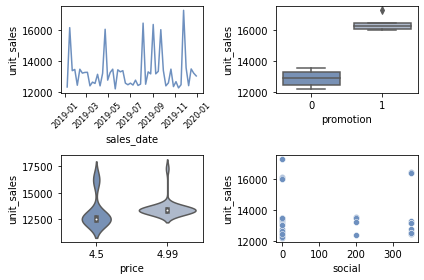

In [13]:
# Set the color palette
sns.set_palette(sns.color_palette("vlag"))

#Initialize subplots with number of rows and number of columns
figure, ax = plt.subplots(nrows = 2, ncols = 2)

#Get readable axis labels for plot 1 which has a date on the x-axis(time series plot)
plt.sca(ax[0, 0])
plt.xticks(rotation=45, fontsize = 8)
#plt.xticks([]) #This disables the x-ticks (uncomment and run if you prefer the x-axis to be blank)

#See the distribution of the data
sns.lineplot(data=df, x="sales_date",y="unit_sales", ax=ax[0,0])
sns.boxplot(data=df, x="promotion", y="unit_sales", ax=ax[0,1])
sns.scatterplot(data=df, x="social", y="unit_sales", ax=ax[1,1])
sns.violinplot(data=df, x="price", y="unit_sales", ax=ax[1,0])

#Gives a tidy layout
plt.tight_layout()

#Show plot
plt.show()

In [14]:
#Correlation Plot Matrix
#Pearson is the default correlation method that is used for normally distributed data
corr = df.corr(method = "pearson")

corr.style.background_gradient(cmap='RdBu')

,unit_sales,promotion,social,price
unit_sales,1.000000,0.930216,0.039319,0.140780
promotion,0.930216,1.000000,0.067907,-0.213623
social,0.039319,0.067907,1.000000,-0.132095
price,0.140780,-0.213623,-0.132095,1.000000


In [16]:
#Using to_excel from pandas
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#
df.to_excel("weekly_sales_data.xlsx", sheet_name='Sheet1')

##Check if files exist in directory we designated above using os package (If created successfully, will return TRUE)
import os
os.path.isfile("weekly_sales_data.xlsx")

True